<a href="https://colab.research.google.com/github/FransTan/Reinforcement-Learning/blob/main/SARSA%20Algorithm%20for%20Frozen%20Lake%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penerapan SARSA pada Frozen lake Environment (GYM OPEN AI)**
#**Anggota Kelompok :**
- Fransiskus Jonathan Tanudjaja (Eunoia)
- Himansyah Muqorrobin (Eunoia)
- Nur Laily Afiah (Eunoia)
- Rahmafatin Nurul Izza (Eunoia)
- Fani Oktaf Laurisa (Jatayu) 


## Install modul yang belum ada 

In [ ]:
# Jika belum terinstall
!pip install gym
!pip install pygame

## Import modul yang dibutuhkan

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Deklarasi Enviroment & Nilai Paramter-Parameter

In [ ]:
env = gym.make("Taxi-v3")

alpha = 0.3       #learning rate (0.4)
gamma = 0.999       #discount factor
epsilon = 0.9       #epsilon greedy
min_epsilon = 0.01
max_epsilon = 0.9
decay_rate = 0.01

episode  = 10000
timestep = 2000 #2500
score_per_episode = []

## Membuat fungsi untuk menentukan action berdasarkan greedy-epsilon policy

In [ ]:
# Epsilon Greedy
q_table = np.zeros((env.observation_space.n, env.action_space.n))
score = []

def choose_action(observation):
  action=0
  if np.random.uniform(0, 1) < epsilon:
    action = env.action_space.sample()
  else:
    action = np.argmax(q_table[observation])
  return action

## Lakukan pengujian pada agent yang telah dibuat sebanyak 10000 episodes dengan algoritma SARSA

In [ ]:
wins = 0
rewards=0
for i in range(episode):
    observation = env.reset()
    action = choose_action(observation)

    prev_observation = None
    prev_action      = None

    t = 0

    for t in range(timestep):
        # env.render(mode='human')
        observation, reward, done, info = env.step(action)

        action = choose_action(observation)

        if not prev_observation is None:
            q_old = q_table[prev_observation][prev_action]
            q_new = q_old
            if done:
                q_new += alpha * (reward - q_old)
            else:
                q_new += alpha * (reward + gamma * q_table[observation][action] - q_old)

            new_table = q_table[prev_observation]
            new_table[prev_action] = q_new
            q_table[prev_observation] = new_table

        prev_observation = observation
        prev_action = action

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * i)

        rewards +=1

        if reward == 1.0:
          wins += 1 

        if done:
            if len(score) < 100:
                score.append(reward)
            else:
                score[i % 100] = reward

            print("Episode {} finished after {} timesteps with r={}. Running score: {}".format(i, t, reward, np.mean(score)))
            break
    score_per_episode.append(np.mean(score))

Streaming output truncated to the last 5000 lines.
Episode 5000 finished after 9 timesteps with r=20. Running score: 20.0
Episode 5001 finished after 14 timesteps with r=20. Running score: 20.0
Episode 5002 finished after 13 timesteps with r=20. Running score: 20.0
Episode 5003 finished after 10 timesteps with r=20. Running score: 20.0
Episode 5004 finished after 10 timesteps with r=20. Running score: 20.0
Episode 5005 finished after 10 timesteps with r=20. Running score: 20.0
Episode 5006 finished after 11 timesteps with r=20. Running score: 20.0
Episode 5007 finished after 13 timesteps with r=20. Running score: 20.0
Episode 5008 finished after 10 timesteps with r=20. Running score: 20.0
Episode 5009 finished after 12 timesteps with r=20. Running score: 20.0
Episode 5010 finished after 10 timesteps with r=20. Running score: 20.0
Episode 5011 finished after 14 timesteps with r=20. Running score: 20.0
Episode 5012 finished after 15 timesteps with r=20. Running score: 20.0
Episode 5013 f

## Menampilkan Performa SARSA

In [ ]:
print("Total Wins :", wins)
print("Average Reward :", wins/10000)
print ("Performance :", rewards/episode, "\n")

# Run Pertama
# Total Wins : 5367
# Average Reward : 0.5367

# Run Kedua
# Total Wins : 5268
# Average Reward : 0.5268

# Run Ketiga 
# Total Wins : 5147
# Average Reward : 0.5147

# Run Keempat
# Total Wins : 5296
# Average Reward : 0.5296

# Run Kelima
# Total Wins : 5246
# Average Reward : 0.5246

# Total Wins : 5594 (l.r 0.3)
# Average Reward : 0.5594
# Performance : 41.6135

# Total Wins : 5781
# Average Reward : 0.5781
# Performance : 35.6578 

# Total Wins : 5623
# Average Reward : 0.5623
# Performance : 41.792 

Total Wins : 0
Average Reward : 0.0
Performance : 17.1812 



## Plot performa untuk setiap episodes

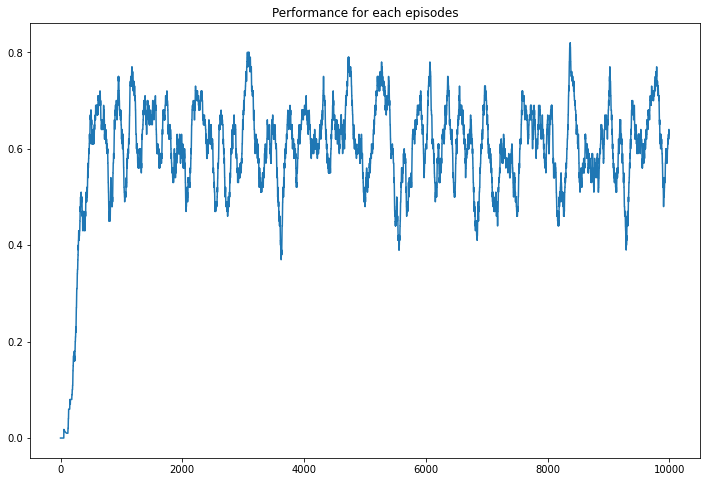

In [ ]:

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Performance for each episodes")

pd.Series(score_per_episode).plot(kind='line')
plt.show()

## Q-Table Yang Berhasil Terbentuk

In [ ]:
print(q_table)

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.80244207  -1.79102875  -6.54681761  -6.66234735   9.90020369
   -3.95758436]
 [ -6.25747449   6.62282008  -6.29255057  -1.03800361  12.04154491
  -10.31615383]
 ...
 [ -3.95316631  -4.06144644  -3.81367469   1.66856558  -7.65391272
   -6.69314046]
 [ -5.04654799  -0.74693872  -5.43861176  -4.80088302  -9.98743218
  -12.0862339 ]
 [ -1.47859126  -1.19514532  -0.8938659   18.57139753  -7.11885871
   -5.18991   ]]


## Lakukan Testing & Rendering (1 episodes)

In [ ]:
observation = env.reset()
action = choose_action(observation)
t = 0

for t in range(timestep):
    env.render()
    observation, reward, done, info = env.step(action)
    action = choose_action(observation)

    if not prev_observation is None:
        q_old = q_table[prev_observation][prev_action]
        q_new = q_old
        if done:
            q_new += alpha * (reward - q_old)
        else:
            q_new += alpha * (reward + gamma * q_table[observation][action] - q_old)

    prev_observation = observation
    prev_action = action

    if done:
        if len(score) < 100:
            score.append(reward)
        else:
            score[i % 100] = reward

        print("Episode {} finished after {} timesteps with r={}. Running score: {}".format(10000, t, reward, np.mean(score)))
        break


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (U